<a href="https://colab.research.google.com/github/KeyurIITGN/TEMP_REP/blob/main/1_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent: Convex vs Non-Convex Functions

In this notebook, we’ll explore how **Gradient Descent** behaves on:
- A **convex** function with a single minimum
- A **non-convex** function with multiple local minima

We'll also visualize the optimization path to better understand the algorithm.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Implement Gradient Descent

In [ ]:
# Gradient Descent (returns full history)
def gradient_descent_1d(start, lr=0.1, n_iter=50):
    x = start
    history = [x]
    for _ in range(n_iter):
        grad = grad_f(x)
        x -= lr * grad
        history.append(x)
    return history

Code for visualizating gradient descent step updates

In [ ]:
def animate_gd(lr=0.1, start=0.0):
    history = gradient_descent_1d(start=start, lr=lr, n_iter=50)
    x_path = np.array(history)
    y_path = f(x_path)

    x_vals = np.linspace(min(x_path)-2, max(x_path)+2, 400)
    y_vals = f(x_vals)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x_vals, y_vals, 'gray')
    point, = ax.plot([], [], 'ro')
    path, = ax.plot([], [], 'r-', alpha=0.5)
    ax.set_title(f"Gradient Descent Animation\nStart: {start}, Learning Rate: {lr}")
    ax.set_xlim(min(x_vals), max(x_vals))
    ax.set_ylim(min(y_vals)-1, max(y_vals)+1)
    ax.grid(True)

    def init():
        point.set_data([], [])
        path.set_data([], [])
        return point, path

    def update(i):
        # The following lines were modified to fix the error
        point.set_data([x_path[i]], [y_path[i]])  # Pass x and y as lists
        path.set_data(x_path[:i+1], y_path[:i+1])
        return point, path

    ani = FuncAnimation(fig, update, frames=len(x_path), init_func=init,
                        blit=True, interval=100, repeat=False)
    plt.close(fig)
    from IPython.display import display
    display(HTML(ani.to_jshtml()))
    return

## Convex Function: $f(x) = x^2$

In [ ]:
# Define convex function and gradient
def f(x):
    return np.array(x)**2

def grad_f(x):
    return 2 * np.array(x)

Let's visualize the function before applying Gradient Descent.

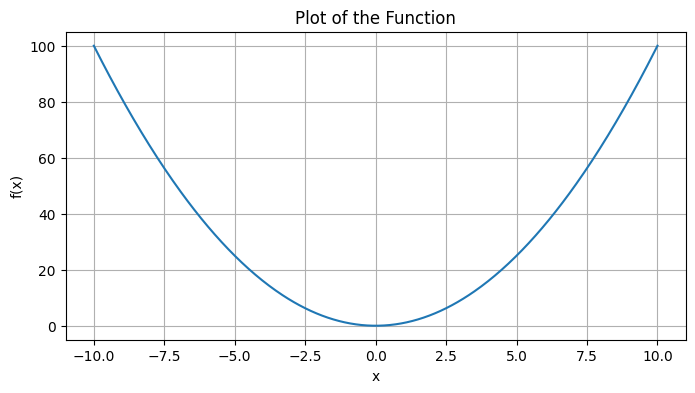

In [ ]:
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals)
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Let's run gradient descent starting from `x=5` with learning rate `0.1`.
We expect it to converge to the global minimum at `x = 0`.

In [ ]:
animate_gd(lr=0.1, start=5)

## Non-Convex Function:
$$f(x) = \sin(x) + 0.1x^2$$

In [ ]:
# Define non-convex function and gradient
def f(x):
    x = np.array(x)
    return np.sin(x) + 0.1 * x**2

def grad_f(x):
    x = np.array(x)
    return np.cos(x) + 0.2 * x

Let's visualize the function before applying Gradient Descent.

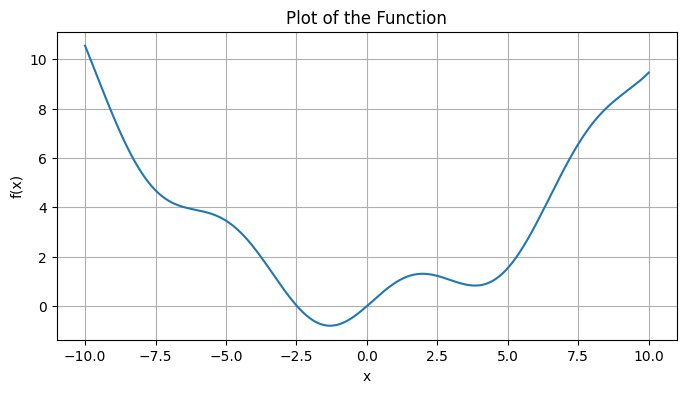

In [ ]:
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals)
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

This function has multiple local minima. Gradient descent may behave differently depending on where we start.
Let's try starting from `x=-5` and `x=5`.

In [ ]:
animate_gd(lr=0.1, start=-5)

# **Questions**

1. Report your observations for `lr = [0.01, 5.0,  10]
2. Change initialization (`start`) to [-10, -3, 3, 10] and report your observations for `lr=0.1`.